In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib as mpl
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

# Entendimiento y preparación de los datos

In [2]:
data = pd.read_csv('2017-18_NBA_salary.csv')
data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Como podemos ver, cada datapoint tiene 28 características. Tal vez en un futuro tengamos que prescindir de algunas columnas. Lo que haremos a continuación para comodidad, es hacer que la columna Salary quede de última, pues es la variable dependiente

In [3]:
cols = list(data.columns)
a, b = cols.index('Salary'), cols.index('VORP')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]
data

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615
1,Zaza Pachulia,0.7,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,3477600
2,Zach Randolph,0.0,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,12307692
3,Zach LaVine,-0.1,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,3202217
4,Zach Collins,-0.2,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,3057240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,3.4,Dominican Rep...,3,31,BOS,70,2219,17.5,0.577,...,14.3,18.4,3.8,3.8,7.6,0.164,1.1,3.0,4.1,27734405
481,Abdel Nader,-0.3,Egypt,58,24,BOS,44,463,5.7,0.464,...,17.1,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,1167333
482,Aaron Harrison,0.0,USA,62,23,DAL,7,164,6.6,0.411,...,3.9,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,83129
483,Aaron Gordon,1.0,USA,4,22,ORL,55,1838,16.6,0.531,...,9.7,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,5504420


# Exploración de los datos

Miremos cuales son los tipos de las caracteristicas de cada datapoint

In [4]:
data.dtypes

Player              object
VORP               float64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
Salary               int64
dtype: object

Podemos observar que aquí el salario esta en entero, sin embargo, esto podría traernos problemas futuros, por lo que se cambiará a tipo float

In [5]:
data ['Salary'] = data['Salary'].astype(float)
data

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
0,Zhou Qi,-0.2,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,815615.0
1,Zaza Pachulia,0.7,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,3477600.0
2,Zach Randolph,0.0,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,12307692.0
3,Zach LaVine,-0.1,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,3202217.0
4,Zach Collins,-0.2,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,3057240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,3.4,Dominican Rep...,3,31,BOS,70,2219,17.5,0.577,...,14.3,18.4,3.8,3.8,7.6,0.164,1.1,3.0,4.1,27734405.0
481,Abdel Nader,-0.3,Egypt,58,24,BOS,44,463,5.7,0.464,...,17.1,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,1167333.0
482,Aaron Harrison,0.0,USA,62,23,DAL,7,164,6.6,0.411,...,3.9,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,83129.0
483,Aaron Gordon,1.0,USA,4,22,ORL,55,1838,16.6,0.531,...,9.7,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,5504420.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           485 non-null    object 
 1   VORP             485 non-null    float64
 2   NBA_Country      485 non-null    object 
 3   NBA_DraftNumber  485 non-null    int64  
 4   Age              485 non-null    int64  
 5   Tm               485 non-null    object 
 6   G                485 non-null    int64  
 7   MP               485 non-null    int64  
 8   PER              485 non-null    float64
 9   TS%              483 non-null    float64
 10  3PAr             483 non-null    float64
 11  FTr              483 non-null    float64
 12  ORB%             485 non-null    float64
 13  DRB%             485 non-null    float64
 14  TRB%             485 non-null    float64
 15  AST%             485 non-null    float64
 16  STL%             485 non-null    float64
 17  BLK%            

Como vemos, hay 485 datapoints, y ningun dato tiene caracteristicas null

In [7]:
data.describe(include="all")

,Player,VORP,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,Salary
count,485,485.000000,485,485.000000,485.000000,485,485.000000,485.000000,485.000000,483.000000,...,483.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02
unique,483,NaN,44,NaN,NaN,31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kay Felder,NaN,USA,NaN,NaN,TOT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,374,NaN,NaN,55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.598763,NaN,29.451546,26.263918,NaN,50.167010,1154.142268,13.260825,0.535387,...,13.140373,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,6.636507e+06
std,NaN,1.245653,NaN,21.125760,4.272297,NaN,24.874872,811.357419,8.769280,0.112352,...,6.115290,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,7.392602e+06
min,NaN,-1.300000,NaN,1.000000,19.000000,NaN,1.000000,1.000000,-41.100000,0.000000,...,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,4.608000e+04
25%,NaN,-0.100000,NaN,11.000000,23.000000,NaN,29.000000,381.000000,9.800000,0.505500,...,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,1.471382e+06
50%,NaN,0.100000,NaN,25.000000,26.000000,NaN,59.000000,1134.000000,13.200000,0.545000,...,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,3.202217e+06
75%,NaN,0.900000,NaN,47.000000,29.000000,NaN,71.000000,1819.000000,16.500000,0.582500,...,15.750000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,1.000000e+07


### A continuación analizaremos característica por característica:
#### VORP
El VORP (Value Over Replacement Player) es una estadística que demuestra cuanto contribuye un jugador a su equipo en comparación con un jugador de nivel de reemplazo. Por ejemplo, un jugador con un VORP de 4.0 debería cobrar el doble que un jugador con un VORP de 2.0.
En este caso, se puede ver que el valor mínimo de esta variable es negativo, es decir, hay jugadores que en lugar de ayudar a su equipo, lo perjudican, o bueno, esa es la interpretación de la información.

Por otro lado, el valor máximo de VORP es 8.6 y vemos que la media es 0.5, lo que sugiere que ese 8.6 es por alguien excepcional. Además, se puede ver que el percentil 75% no pasa de 0.9, lo que sugiere que hay una distribución sesgada y/o datos atípicos

#### NBA Country
Esta variable describe el país de procedencia de los jugadores que participaron en la NBA durante la temporada 2017-2018. En este caso se puede observar que en esta temporada USA tuvo 374 jugadores. Sin embargo, se debe aclarar que esta variable no representa valores únicos, pues en distintos registros se podrá notar que un mismo jugador llegó a participar en más de un equipo esa temporada.

#### NBA DraftNumber

Esta variable el número del sorteo mediante el cual los  equipos, eligen a los que serán jugadores del futuro, y es una medida para igualar la liga, si un equipo queda de último en la clasificación una temporada, en el próximo draft ese equipo tiene muchas papeletas para elegir a los mejores jugadores jovenes.
Por esta parte la media parece que sí esta como acorde según el máximo y mínimo y los datos parecen estar bien distribuidos  según los percentiles

#### Age
Esta variable representa la edad de cada jugador. Como se puede observar el jugador más joven tiene 19 años, mientras el mayor tiene 41 años. Por otro lado, la media de los jugadores que participaron en la temporada de análisis es un poco más de 26 años.

#### TM
Esta variable es el nombre del equipo en que participó un determinado jugador. En esta temporada participaron 31 equipos, y el quipo con mayor número de rotaciones de jugadores fue TOT con 55.

#### G
Esta variable representa el número de juegos en los que participó un jugador. Se puede observar que la media es 50 y el mínimo de encuentros disputados por un jugador 1, mientras el máximo es 79 partidos. Esto sugiere que el mínimo podría ser un valor atípico y que no hay muchos jugadores que jueguen pocos partidos (se puede ver en los percentiles también)

#### MP
Esta variable representa el total de minutos jugados por cada jugador. Se puede observar que el mínimo es de 1 minuto y el máximo es de 2898, mientras la media es de 1154 minutos. Lo anterior sugiere que muy pocos jugadores llegan a jugar poco. De igual modo, no muchos jugadores llegan a jugar 2898 minutos o un valor cercano. Aquí podría decirse que 2898 o 1 son valores atípicos. Más adelante tendríamos que ver con más detalle. Cabe destacar que el 50% de los jugadores cuentan con un valor cercano a la media.

#### PER
El PER (Player Efficiency Rating) es una estadística que mide el rendimiento de un jugador por minuto jugado, pretende combinar todas las contribuciones de un jugador en un solo número.
Aquí se puede observar un sesgo y no solo eso, se puede ver que hay datos atípicos. Se ve que el valor mínimo es -41.1, mientras el máximo es de 134. Este último valor puede ser atípico, pues el percentil 75% apenas llega a 16. Esta información contrasta con el VORP.

#### TS%
El TS& (True Shooting percentage) es la medida de la eficiencia de los tiros de un jugador, contando tiros de campo, tiros de 3 puntos y tiros libres. Aquí hay algo curioso, hay un máximo de 1.5%, pero según los percentiles y la media los valores comunes datan mayoritariamente en 0.5%. Esto sugiere que probablemente el 1.5% sea un valor atípico.

#### BPM
BPM (Box Plus/Minus) utiliza la información de la puntuación del cuadro de un jugador, la posición y el rendimiento general del equipo para estimar la contribución del jugador en puntos por encima del promedio de la liga por cada 100 posesiones jugadas. BPM no tiene en cuenta el tiempo de juego, es puramente una estadística de velocidad.

Podemos ver que la mayoría de los jugadores tienen una contribución baja, pues la media se sitúa en -1.760206. Tiene sentido que la media ronde el cero, pues podemos ver en los percentiles y en el valor mínimo y máximo la distancia entre los datos.

#### DBPM
Defensive Box Plus/Minus, igual que BPM, pero en el juego defensivo del jugador. En el DBPM podemos ver cierta homogeneidad en los datos, pues no se alejan tanto entre sí. 

#### OBPM
Defensive Box Plus/Minus, igual que BPM, pero en el juego ofensivo del jugador. En el OBPM podemos ver una semejanza en los datos respecto a BPM. La mayoría de los jugadores tienen una contribución baja, pues la media se sitúa por debajo de cero. Tiene sentido que la media ronde el cero, pues podemos ver en los percentiles y en el valor mínimo y máximo la distancia entre los datos.

#### WS/48	
Número estimado de victorias contribuidas por un jugador por 48 minutos. Aquí también podemos ver que existe poca distancia entre los datos, la media es 0.079959, lo cual quiere decir que en promedio un jugador contribuye 0.079959 victorias por cada 48 minutos.

#### WS
Número estimado de victorias contribuidas por un jugador. Aquí podemos ver que en promedio los jugadores aportar 2.455258, lo cual es algo bueno, pues quiero decir la mayoría aporta a la victoria. Los datos están cerca entré sí y tienden a ser positivos. 

#### DWS
Número estimado de victorias contribuidas por un jugador dado su desempeño defensivo. Aquí vemos datos meramente positivos y no muy alejados entre sí. El valor máximo pareciera ser un valor atípico, pues se aleja mucho de los percentiles y la media.

#### OWS
Número estimado de victorias contribuidas por un jugador dado su desempeño ofensivo. También se observa una media positiva, sin embargo, el valor valor máximo podría ser un dato atípico, pues se aleja bastante de los percentiles y la media.

#### Salary
Esta variable representa el salario anual en dolares de cada jugador. Comparando el valor mínimo con el máximo, se nota una diferencia aproximada por un factor de 10 * x donde x<10. Sin embargo, no parece haber una distribución muy mala.

### Aspectos generales:

- Las escalas de los datos varían mucho, por lo que en un futuro tal vez sea necesario hacer una normalización
- Hay datos atípicos. Pero en un principio no sería bueno no tenerlos en cuenta, puesto que esos datos atípicos no son atípicos sin ninguna razón y en la vida real estos datos atípicos se pueden dar y se dan. Por lo que pueden ser muy importantes y eliminarlos podría hacer que el modelo no tenga en cuenta la influencia de los datos atípicos en los salarios. En otras palabras, los datos de jugadores muy extraordinarios (aunque pocos) deberían tenerse en cuenta, porque podría servir en caso de que se quiera estimar el salario de un nuevo jugador extraordinario. Sin embargo, hay que ver más adelante cómo se comporta el modelo, ya que estos datos atípicos pueden tener una mala influencia en la estimación de salarios de jugadores "comunes" o viceversa y, además, en tal caso podría ser mejor hacer modelos diferentes según el tipo de jugador.

## Ahora utilicemos algunos gráficos para entender mejor la situación

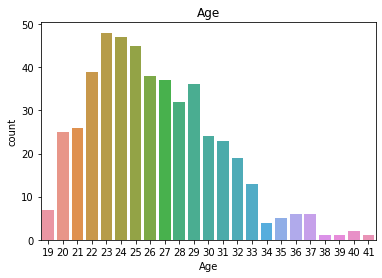

In [8]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[4], data=data)
plt.title(data.columns[4])

plt.show()

Se puede observar que la mayoría de jugadores está entre los 20 a 30 años. Esto es muy importante tenerlo en cuenta, puesto que por ejemplo, si se quiere estimar el salario de una persona de 40 o 41 años, se tendría que tener en cuenta que no se dispone de mucha información en la categoría descrita, por lo que la estimación puede no ser confiable. Además, se puede sugerir que un modelo basado en la edad no podría ser tan confiable. Sin embargo, se hace la salvedad de que la edad sí puede influir, pero más adelante se harán pruebas para valorar esta variable.

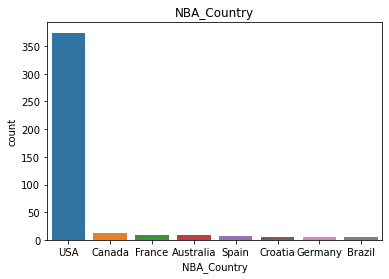

In [9]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[2], data=data, order=data.NBA_Country.value_counts().iloc[:8].index)
plt.title(data.columns[2])

plt.show()

Con respecto al país de procedencia, se puede ver que hay un sesgo bastante alto, la mayoría de jugadores son de USA, mientras los demás son casos muy particulares. De hecho, limitamos a los primero 8 países que más tenían y aunque son solo los 8 países que más tienen jugadores en la NBA la diferencia es abismal. Esto podría sugerir que utilizar el país de procedencia para hacer la estimación no es muy buena idea, al igual que la edad, principalmente porque no están equilibradas

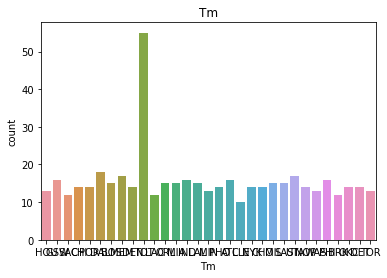

In [10]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[5], data=data)
plt.title(data.columns[5])

plt.show()

Aquí se ve que los jugadores por equipo están medio bien distribuidos, es decir que estas "clases" están equilibradas, a excepción del equipo "TOT". Habrá que hacer algo con ese equipo para equilibrar esta clase, debido a que utilizar un equipo sí puede ser un buen indicador, ya que pueden haber equipos que pagan mejor que otros.

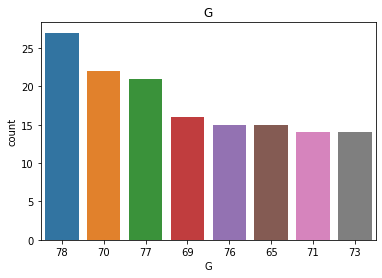

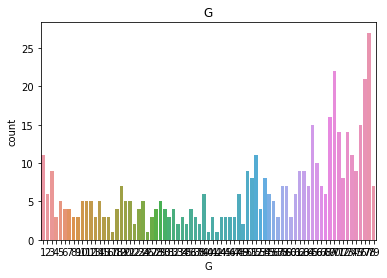

In [11]:
fig, ax = plt.subplots()
sns.countplot(x=data.columns[6], data=data, order=data.G.value_counts().iloc[:8].index)
plt.title(data.columns[6])

plt.show()

sns.countplot(x=data.columns[6], data=data)
plt.title(data.columns[6])
plt.show()

Bueno, con respecto a los partidos jugados se ve que existe un poco de desequilibrio, pero tampoco es muy muy desequilibrado. Esta característica sería buena tenerla en cuenta, puesto que entre más partidos juegue una persona, puede indicar que es más solicitado y/o apreciado y así puede reflejarse en su salario. Además, la cantidad por grupo de jugadores agrupados por juegos  no varía mucho pues el rango va entre [0,30].

Ahora bien, estas son las características que se podían analizar con un gráfico de barras. Con respecto a las otras características se hará más adelante otro tipo de gráficas.

Text(0.5, 1.0, 'String')

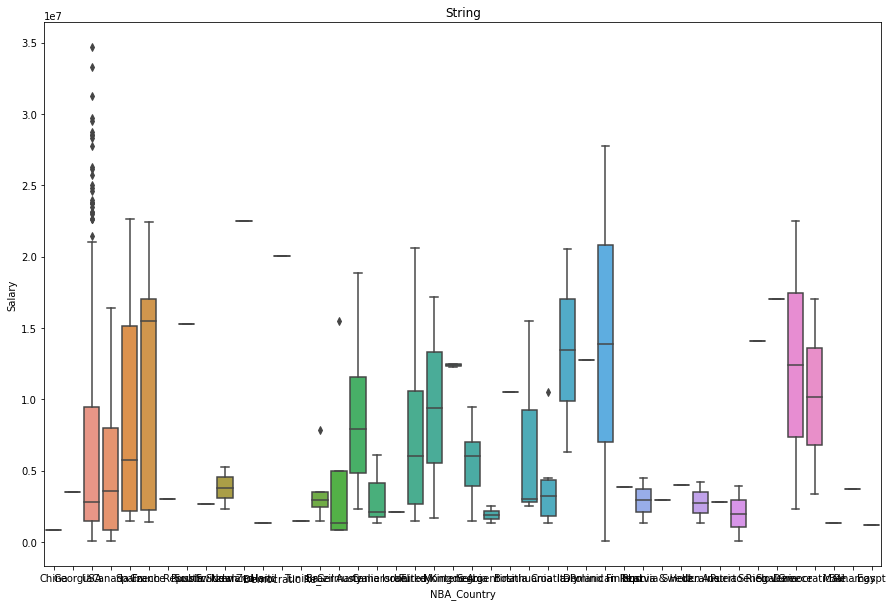

In [13]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[2], y=data['Salary'], data=data)
plt.title("String")

NameError: name 'var_num' is not defined

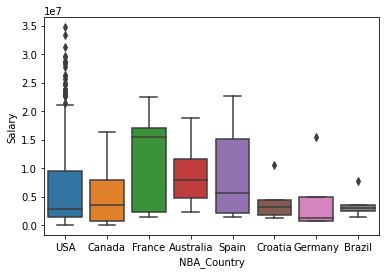

In [14]:
sns.boxplot(x=data.columns[2], y=data['Salary'], data=data, order=data.NBA_Country.value_counts().iloc[:8].index)
plt.title(var_num)

Se puede observar que el salario con respecto al pais de procedencia sí genera diferentes distribuciones y, en general, hay un sesgo positivo en las distribuciones. Sin embargo, se puede notar que hay diferencia en los salarios según el país con respecto al rango. Además, USA tiene muchos datos atípicos

NameError: name 'var_num' is not defined

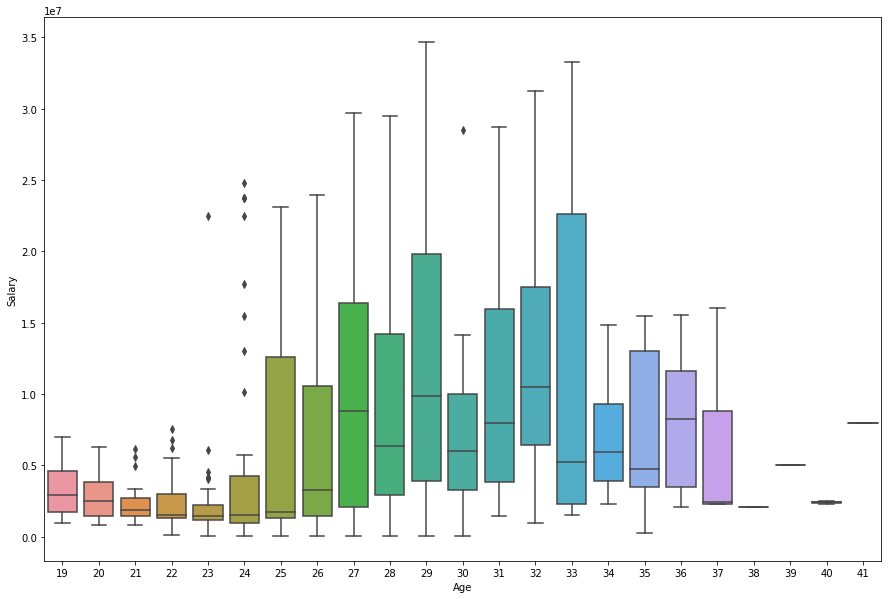

In [15]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[4] ,y=data['Salary'], data=data)
plt.title(var_num)

Aquí podemos ver que de igual manera las distribuciones varían por edad y también resalta una cosa que habíamos dicho anteriormente: entre las edades 20 a 30 años, las cajas son más amplias, lo que sugiere que hay un rango más alto en las distribuciones y esto puede ser causado por el hecho de que es en estas edades donde hay más población

NameError: name 'var_num' is not defined

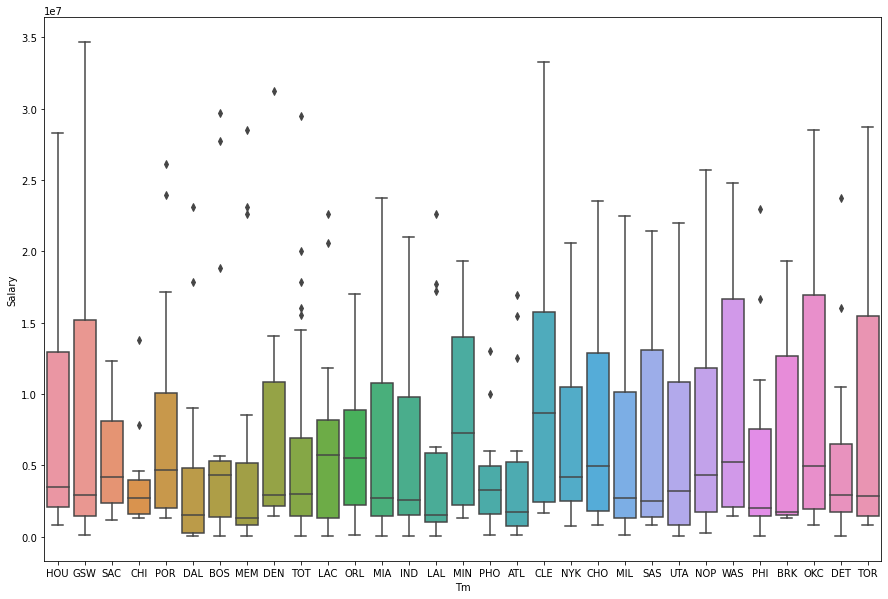

In [16]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[5], y=data['Salary'], data=data)
plt.title(var_num)


Con respecto a los equipos y sus salarios, también hay diferentes distribuciones pero estan casi en el mismo rango. Además se nota que algunos equipos tienen más sesgo positivo que otros y precisamente son los que anteriormente vimos que "pagan más"

NameError: name 'var_num' is not defined

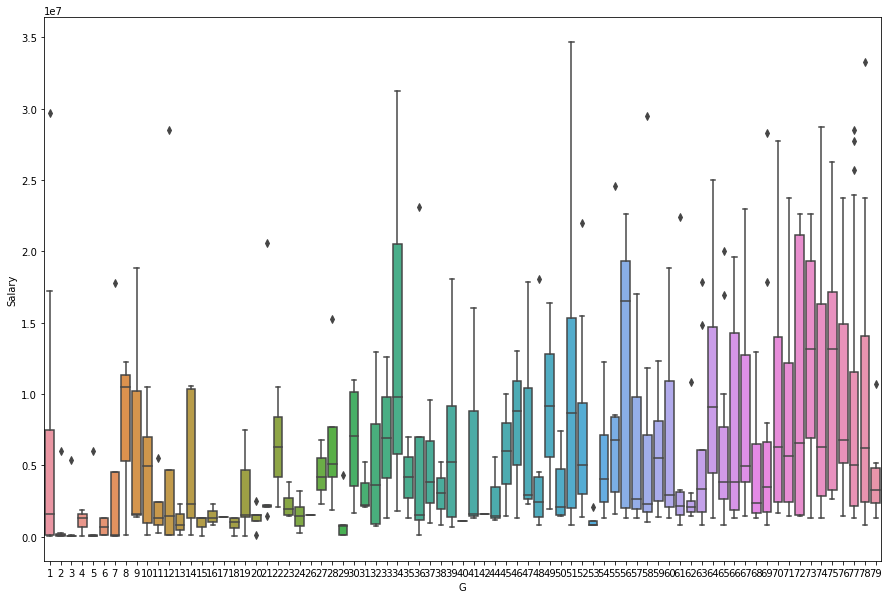

In [17]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x=data.columns[6], y=data['Salary'], data=data)
plt.title(var_num)

Aquí se puede ver entre más juegos participe un jugador, la distribución es más amplia y, de hecho la mayoría tiene un sesgo positivo. Esto puede sugerir, aunque no es seguro, que entre mayor sea la participación de un jugador, tiene la posibilidad de tener salarios mayores

#### Hay varias cosas para resaltar en general

- En primer lugar, el salario ha dado diferentes distribucion según la característica evaluada. Esto no sugiere una conexión directa, pero sí sugiere que si agrupamos por esas características analizadas, se podrían sacar algunas observaciones

- Hay muchas distribuciones, sin embargo el rango de cada distribución no varía mucho. Esto podría dar indicio de que las variables analizadas anteriormente por sí solas no aportan mucha significancia para estimar el salario, pues habían distribuciones con rangos similares.

Hasta ahora solo hemos visto cómo se comportan algunas variables, pero no hemos tocado todas las características.

In [19]:
plt.plot(data.colums[1],data['Salary'],"b.")

AttributeError: 'DataFrame' object has no attribute 'colums'